In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv("economic_index.csv")

In [4]:
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [5]:
# drop uneccesary columns
df_index.drop(columns=["Unnamed: 0","year","month"],inplace=True
    ,axis=1)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

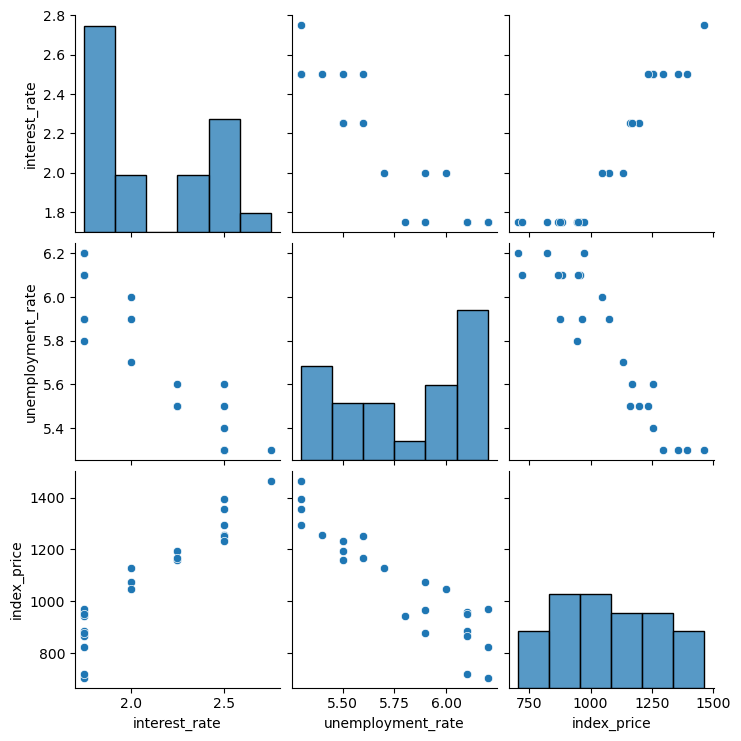

In [8]:
# lets do visualization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


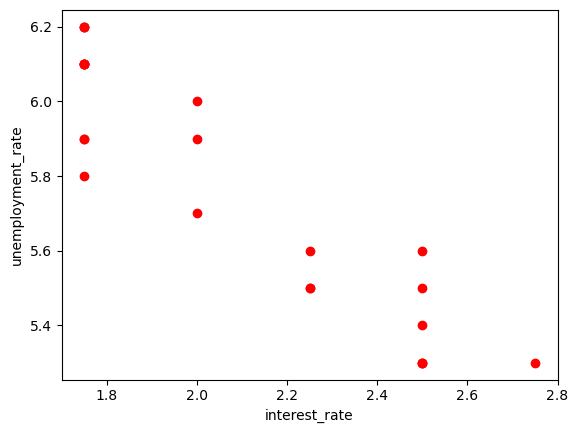

In [10]:
# visualize the datapoints more quickly
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [11]:
# dependent and independent featires
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
import seaborn as sns

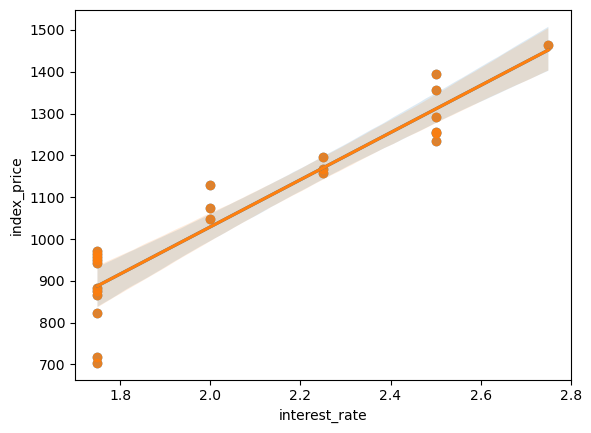

In [25]:
sns.regplot(x=df_index["interest_rate"],y=df_index["index_price"])
plt.show()

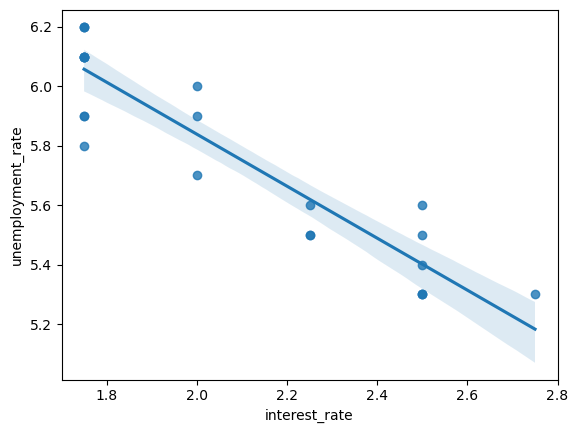

In [26]:
sns.regplot(x=df_index["interest_rate"],y=df_index["unemployment_rate"])
plt.show()

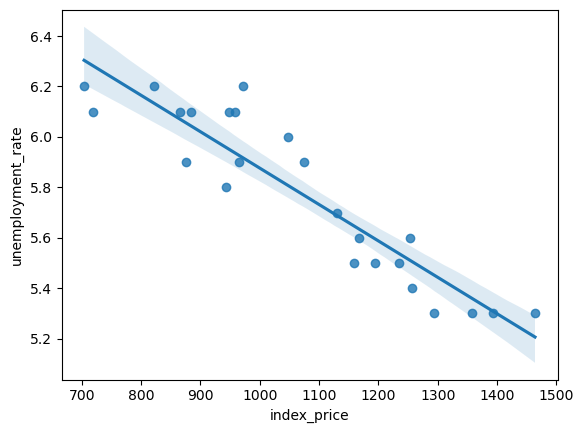

In [27]:
sns.regplot(x=df_index["index_price"],y=df_index["unemployment_rate"])
plt.show()

In [32]:
print(x_train)
print(x_test)

    interest_rate  unemployment_rate
13           1.75                5.9
1            2.50                5.3
21           1.75                6.2
5            2.50                5.6
2            2.50                5.3
12           2.00                6.0
15           1.75                6.1
3            2.50                5.3
4            2.50                5.4
22           1.75                6.2
17           1.75                6.1
20           1.75                5.9
23           1.75                6.1
7            2.25                5.5
10           2.00                5.7
14           1.75                5.8
19           1.75                6.1
6            2.50                5.5
    interest_rate  unemployment_rate
8            2.25                5.5
16           1.75                6.2
0            2.75                5.3
18           1.75                6.1
11           2.00                5.9
9            2.25                5.6


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [41]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()


In [42]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
# cross validation
from sklearn.model_selection import  cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [49]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [50]:
np.mean(validation_score)

-5914.828180162389

In [55]:
# prediction
y_pred=regression.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323554
76.11677139574813


In [ ]:
#  assumptions

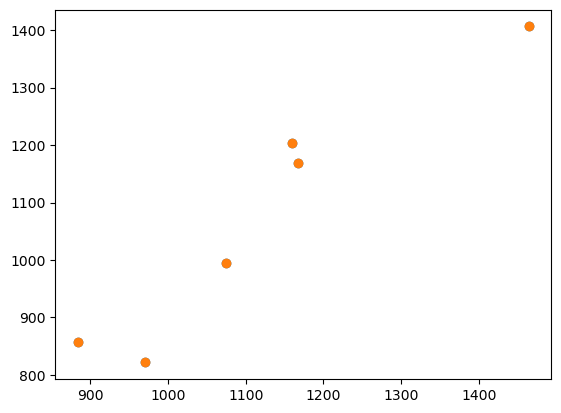

In [58]:
plt.scatter(y_test,y_pred)
plt.show()

In [59]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


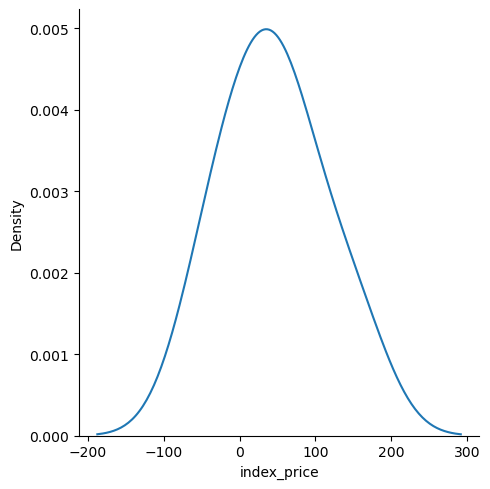

In [61]:
sns.displot(residuals,kind="kde")
plt.show()

In [62]:
# catter plot with respect to prediction and residuals

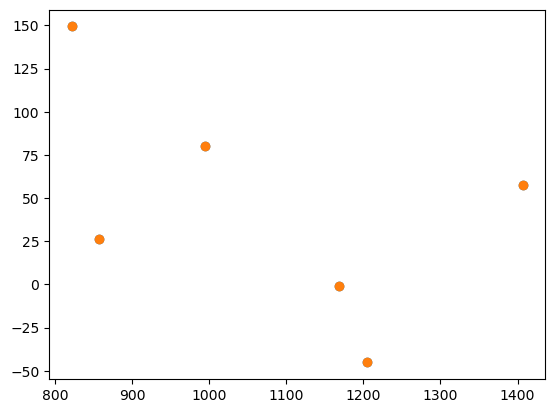

In [64]:
plt.scatter(y_pred,residuals)
plt.show()

In [65]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [69]:
prediction=model.predict(x_test)
print(prediction)
print(model.summary())

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 20 Mar 2025   Prob (F-statistic):                       0.754
Time:                        16:27:28   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

c:\Users\valle\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
model.summary()

c:\Users\valle\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 20 Mar 2025   Prob (F-statistic):                       0.754
Time:                        16:23:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
